# Unit Tests
This script contains validation test for each of the python modules, including:
- Environment
- Robot
- Sensor
- Controller
- Actuator
- Selection
- Visualization

trial:
- initialize environment
    - targets
    
- initialize agents (4 agents)
    - sensor, actuators
    - networks

for i in timesteps:  

        for a in agents:
                1. agent location and orientation - sensor readings
                2. sensor readings - network input
                3. network input - network output
                4. network output - actuator input
                5. actuator input - agent movement
                6. update agent location and orientation
                7. store all information for the current trials

animate trial:
- target
- position and location of the agent at every timestep

In [2]:
from Environment import environment

env = environment()
env.initialize_targets()
env.show()
env.targets

[[(80, 80), 35], [(190, 190), 35], [(80, 80), 35], [(190, 190), 35]]

[[(80, 80), 35], [(190, 190), 35]]

agent loc and orientation - sensor readings:
- IR sensor  

    input:
    - agent location and orientation
    - environment (height & width)
    - location and r of other agents
    
    for each IR sensor:
    1. get IR loc and IR orientation from agent loc and agent orientation
    2. check for wall 
    3. check for other agents
    4. compare readings, take the greater among all
 

- Ground sensor
    
    input:
    - agent location and orientation
    - location and r of all targets (env.targets)
    
    for each ground sensor:
    1. get ground sensor location
    2. check if in each target area
    3. if yes, reading = 1; else reading = 0

- comm sensor
    input:
    - agent location and orientation
    - location an r of other agents
    
    1. get comm sensor loc and orientation
    2. check for the location of each other agent
    3. if an agent is within range, check that agent's comm unit output
    4. 

- IR sensor  

    input:
    - agent location and orientation
    - environment (height & width)
    - location and r of other agents
    
    for each IR sensor:
    1. get IR loc and IR orientation from agent loc and agent orientation
    2. check for wall 
    3. check for other agents
    4. compare readings, take the greater among all

In [3]:
def get_ir_loc(agent_loc, agent_ang, ir_placement):
    """Get location of IR sensor."""
    ang = norm_ang(ir_placement.ang+agent_ang)
    loc = find_loc(agent_loc, ang, ir_placement.distance)
    
    return loc, ang


def check_wall(environment, ir_loc, ir_ang):
    """
    Check reading due to wall.
    
    Logic:
    1. Find the maximum point within range of signal detection (range_max)
    2. See whether this point goes beyond the width and height of the environment.
    3. If it does, that means a wall is within range of detection.
    4. Calculate distance between IR sensor and the closest point to wall.
    5. IR sensor reading is the the ratio between this distance and the max range of detection.
    """
    range_max = find_loc(loc, ang, ir_range)
    if range_max[0] < 0 or range_max[0] > width:
        distance = loc[0]/abs(range_max[0]-loc[0])
    elif range_max[1] < 0 or range_max[0] > height:
        distance = loc[1]/abs(range_max[1]-loc[1])

    else:
        distance = 1

    reading = 1-distance
    
    return reading
    

def check_agent(agents):
    """
    Check reading due to other agents.
    
    Logic:
    1. 
    
    
    """
    


def get_ir_reading(loc, ang, ir_range, agents):
    """
    Get reading in response to obstacle, including wall and other agents.
    The closer the distance, the higher the reading.

    Method:
    - 1. check for wall (write this first)
        - find intersect with the wall it's facing
        - check if distance is less than ir_range
        - right now, linear scaling
    - 2. check for other agents
        - for each of the other agents, check if center is within range
        - if so, check distance
    """
    # check for wall
    tip = find_loc(loc, ang, ir_range)
    if tip[0] <= 0:
        distance = loc[0]/abs(tip[0]-loc[0])
    elif tip[1] <= 0:
        distance = loc[1]/abs(tip[1]-loc[1])

    else:
        distance = 1

    wall_reading = 1-distance

    # check for agent
    for a in agents:
        # distance = agents.loc[0]
        pass

    reading = wall_reading

    return reading

In [4]:
from Helper import find_ang, find_loc, get_distance

In [5]:
ir = ((10, 10), 90, 10)
tip = find_loc(ir[0], ir[1], ir[2])

In [6]:
c1 = ((20, 30), 6)
c2 = ((15, 8), 6)
c3 = ((13, 13), 6)

In [7]:
import math

In [8]:
# c1

a = get_distance(ir[0], c1[0])
b = get_distance(tip, c1[0])
c = get_distance(ir[0], tip)

In [9]:
print(a, b, c)

22.360679774997898 14.142135623730951 10.0


In [10]:
print(ir[0], tip, c1[0])

(10, 10) (10.0, 20.0) (20, 30)


In [14]:
math.sin(x)

0.5911271172152932

In [15]:
math.degrees(math.sin(x))

33.86908897217141

In [13]:
x = b/a

In [16]:
cos_a = (c**2 + b**2 - a**2) / (2 * b * c)
cos_b = (a**2 + c**2 - b**2) / (2 * a * c)
cos_c = (a**2 + b**2 - c**2) / (2 * a * b)


In [17]:
cos_c

0.9486832980505139

In [18]:
a_ang = math.degrees(math.acos(cos_a))
b_ang = math.degrees(math.acos(cos_b))
c_ang = math.degrees(math.acos(cos_c))

In [19]:
print(a_ang, b_ang, c_ang)

135.00000000000003 26.565051177077994 18.434948822922


In [20]:
def solve_triangle(loc_1, loc_2, loc_3):
    
    a = get_distance(loc_1, loc_2)  # between ir and tip
    b = get_distance(loc_1, loc_3)  # between ir and point
    c = get_distance(loc_2, loc_3)  # between tip and point

    cos_a = (c**2 + b**2 - a**2) / (2 * b * c)
    cos_b = (a**2 + c**2 - b**2) / (2 * a * c)
    cos_c = (a**2 + b**2 - c**2) / (2 * a * b)

    a_ang = math.degrees(math.acos(cos_a))  # ang at point
    b_ang = math.degrees(math.acos(cos_b))  # ang at tip
    c_ang = math.degrees(math.acos(cos_c))  # ang at ir

    return a_ang, b_ang, c_ang

In [21]:
solve_triangle(ir[0], tip, c3[0])
# a = ang at point
# b = ang at tip
# c = ang at ir

(111.80140948635182, 23.198590513648202, 45.0)

In [22]:
ang = 90
ir = (4, 1)
tip = find_loc(ir, 100, 2)
c = (4, 4)

In [23]:
a, b, c = solve_triangle(ir, tip, c)

In [24]:
print(a, b, c)

18.626651768632556 151.37334823136746 9.999999999999977


In [25]:
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib.patches import Circle, FancyArrow, Wedge, Ellipse
from Helper import find_dx, find_dy, norm_ang, find_ang, get_distance, find_loc
import math

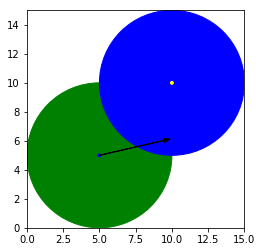

In [26]:
c1 = ((5, 5), 5)
ang = 13
c2 = ((10, 10), 5)

# overlap?
ax = plt.axes(xlim=(0, 15), ylim=(0, 15))
line, = ax.plot([], [])
ax.add_patch(Circle(c1[0], c1[1], color='green')) 
ax.add_patch(Circle(c1[0], 0.1, color='blue')) 
ax.add_patch(Circle(c2[0], c2[1], color='blue')) 
ax.add_patch(Circle(c2[0], 0.1, color='yellow')) 

ax.add_patch(FancyArrow(c1[0][0], c1[0][1], 
                        find_dx(c1[0][0], ang, c1[1]), find_dy(c1[0][1], ang, c1[1]),
                        color='black', length_includes_head=True, head_width=0.3))

ax.set_aspect('equal')

Overlap
a:5, c:7.0710678118654755
angle 91 diff. 314.0


ValueError: math domain error

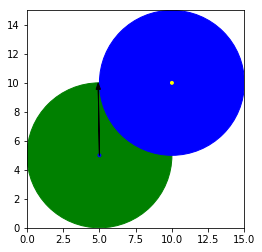

In [27]:
c1 = ((5, 5), 5)
ang = 91
c2 = ((10, 10), 5)

# overlap?
ax = plt.axes(xlim=(0, 15), ylim=(0, 15))
line, = ax.plot([], [])
ax.add_patch(Circle(c1[0], c1[1], color='green')) 
ax.add_patch(Circle(c1[0], 0.1, color='blue')) 
ax.add_patch(Circle(c2[0], c2[1], color='blue')) 
ax.add_patch(Circle(c2[0], 0.1, color='yellow')) 

ax.add_patch(FancyArrow(c1[0][0], c1[0][1], 
                        find_dx(c1[0][0], ang, c1[1]), find_dy(c1[0][1], ang, c1[1]),
                        color='black', length_includes_head=True, head_width=0.3))

ax.set_aspect('equal')

# overlap?

distance = get_distance(c1[0], c2[0])
if distance < c1[1] + c2[1]:
    print('Overlap')
else:
    print('Not overlap')
    
# BC > R?
tip = find_loc(c1[0], ang, c1[1])
BC = get_distance(tip, c2[0])
if BC < c2[1]:
    print('detectable')
    
# actual distance of detection
# assume it's the smaller one
c = distance
a = c2[1]
print('a:{}, c:{}'.format(a, c))
A = norm_ang(find_ang(5, 5, 10, 10) - ang)
print('angle', ang, 'diff.', A)

sin_c = c * (math.sin(math.radians(A))/a)
C = math.degrees(math.asin(sin_c))

possible_b = []
for possible_c in [C, 180-C]:
    B = 180 - (180-possible_c) - A
    #print(B)
    b = math.sin(math.radians(B)) * (a / math.sin(math.radians(A)))
    #print(b)
    possible_b.append(b)
    
for b in possible_b:
    if b < c1[1]:
        print()
        print(b)

Overlap
detectable
a:5, c:5.0
angle 91 diff. 314.0

-1.7024593920297657e-15


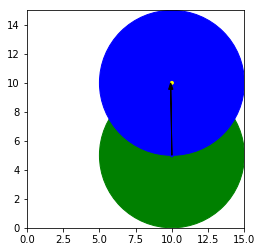

In [28]:
c1 = ((10, 5), 5)
ang = 91
c2 = ((10, 10), 5)

ax = plt.axes(xlim=(0, 15), ylim=(0, 15))
line, = ax.plot([], [])
ax.add_patch(Circle(c1[0], c1[1], color='green')) 
ax.add_patch(Circle(c1[0], 0.1, color='blue')) 
ax.add_patch(Circle(c2[0], c2[1], color='blue')) 
ax.add_patch(Circle(c2[0], 0.1, color='yellow')) 

ax.add_patch(FancyArrow(c1[0][0], c1[0][1], 
                        find_dx(c1[0][0], ang, c1[1]), find_dy(c1[0][1], ang, c1[1]),
                        color='black', length_includes_head=True, head_width=0.3))

ax.set_aspect('equal')

# overlap?

distance = get_distance(c1[0], c2[0])
if distance < c1[1] + c2[1]:
    print('Overlap')
else:
    print('Not overlap')
    
# BC > R?
tip = find_loc(c1[0], ang, c1[1])
BC = get_distance(tip, c2[0])
if BC < c2[1]:
    print('detectable')
    
# actual distance of detection
# assume it's the smaller one
c = distance
a = c2[1]
print('a:{}, c:{}'.format(a, c))
A = norm_ang(find_ang(5, 5, 10, 10) - ang)
print('angle', ang, 'diff.', A)

sin_c = c * (math.sin(math.radians(A))/a)
C = math.degrees(math.asin(sin_c))

possible_b = []
for possible_c in [C, 180-C]:
    B = 180 - (180-possible_c) - A
    #print(B)
    b = math.sin(math.radians(B)) * (a / math.sin(math.radians(A)))
    #print(b)
    possible_b.append(b)
    
for b in possible_b:
    if b < c1[1]:
        print()
        print(b)

In [29]:
cases = [
    [((10, 10), 4), ((5, 5), 4)],
    [((10, 10), 4), ((5, 10), 4)],
    [((10, 10), 4), ((5, 15), 4)],
    [((10, 10), 4), ((10, 5), 4)],
    [((10, 10), 4), ((10, 15), 4)],
    [((10, 10), 4), ((15, 5), 4)],
    [((10, 10), 4), ((15, 10), 4)],
    [((10, 10), 4), ((15, 15), 4)],
]

Overlap
detectable, 2
a:4, c:5.0
angle 232 diff. 52
final 2.3883970165059374


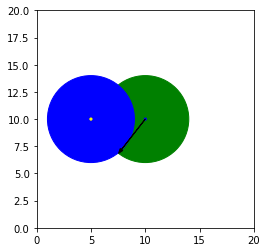

In [30]:
c = 1

c1 = cases[c][0]
c2 = cases[c][1]
ang = 232

ax = plt.axes(xlim=(0, 20), ylim=(0, 20))
line, = ax.plot([], [])

ax.add_patch(Circle(c1[0], c1[1], color='green')) 
ax.add_patch(Circle(c1[0], 0.1, color='blue')) 
ax.add_patch(Circle(c2[0], c2[1], color='blue')) 
ax.add_patch(Circle(c2[0], 0.1, color='yellow')) 

ax.add_patch(FancyArrow(c1[0][0], c1[0][1], 
                        find_dx(c1[0][0], ang, c1[1]), find_dy(c1[0][1], ang, c1[1]),
                        color='black', length_includes_head=True, head_width=0.3))

ax.set_aspect('equal')

# overlap - quadrant universal
distance = get_distance(c1[0], c2[0])
if distance < c1[1] + c2[1]:
    print('Overlap')
else:
    print('Not overlap')


# Detectable?
tip = find_loc(c1[0], ang, c1[1])
BC = get_distance(tip, c2[0])
if BC < c2[1]:
    print('detectable, 1')
else:
    other_ang = find_ang(c1[0][0], c1[0][1], c2[0][0], c2[0][1])
    diff = abs(ang-other_ang)
    closest = distance * math.sin(math.radians(diff)) / math.sin(math.radians(90))
    if closest < c2[1]:
        print('detectable, 2')
        
# actual distance of detection
# among all possible answers, it's smaller than range and the smaller one
c = distance
a = c2[1]
print('a:{}, c:{}'.format(a, c))
A = abs(find_ang(c1[0][0], c1[0][1], c2[0][0], c2[0][1]) - ang)
print('angle', ang, 'diff.', A)

sin_c = c * (math.sin(math.radians(A))/a)
C = math.degrees(math.asin(sin_c))

possible_b = []
for possible_c in [C, 180-C]:
    B = 180 - (180-possible_c) - A
    #print(B)
    b = math.sin(math.radians(B)) * (a / math.sin(math.radians(A)))
    #print(b)
    possible_b.append(b)
    
final_b = []
for b in possible_b:
    if b < c1[1]:
        final_b.append(b)
print('final', min(final_b))


In [31]:
# actual distance of detection
c = distance
a = c2[1]
A = find_ang(5, 5, 10, 10) - ang
b = c * math.cos(A) - math.sqrt(a**2 - c**2 * math.sin(A)**2)
print(b)

ValueError: math domain error

In [32]:
 b=ccosA+/-sqrt(a^2-c^2sin^2A). 

SyntaxError: invalid syntax (<ipython-input-32-004513fc177d>, line 1)

In [33]:
find_ang(5, 5, 10, 10) - ang

-187.0

In [127]:
c1[0]

(5, 5)

In [128]:
c2[0]

(10, 10)

In [ ]:
cases = [
    [((10, 10), 4), ((5, 5), 4)],
    [((10, 10), 4), ((5, 10), 4)],
    [((10, 10), 4), ((5, 15), 4)],
    [((10, 10), 4), ((10, 5), 4)],
    [((10, 10), 4), ((10, 15), 4)],
    [((10, 10), 4), ((15, 5), 4)],
    [((10, 10), 4), ((15, 10), 4)],
    [((10, 10), 4), ((15, 15), 4)],
]



In [ ]:
# ir sensor: loc, ang, range


def get_ir_reading(IR, environment, agents):
    pass


def check_wall(environment, ir_loc, ir_ang):
    """
    Check reading due to wall.

    Logic:
    1. Find the maximum point within range of signal detection (range_max)
    2. See whether this point goes beyond the width and height of the environment.
    3. If it does, that means a wall is within range of detection.
    4. Calculate distance between IR sensor and the closest point to wall.
    5. IR sensor reading is the the ratio between this distance and the max range of detection.
    """
    range_max = find_loc(loc, ang, ir_range)

    else:
        distance = 1

    reading = 1-distance

return reading



In [ ]:
Test_wall = [
    [(260, 260), 1]
]